In [1]:
# Import libraries of manipulating and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# With %matplotlib inline save the graphs in notebook.
%matplotlib inline

In [3]:
# read data and show.
df = pd.read_csv('data/kyphosis.csv')
'''
Data Explanation
Kyphosis: abnormally excessive convex curvature of the spine.
Kyphosis Dataset: kyphosis data frame has 81 rows and 4 columns and representing data on children who have had corrective spinal surgery.
Inputs: 
---> Age: Months of patient when start surgery.
---> Number: Number of vertebrae involved.
---> Start: The number of the first (topmost) vertebra operated on.
Outputs: 
---> Kyphosis: (Binary) Determines if there is presence of kyphosis after the operation.
'''
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


Exploratory Data Analysis.

In [4]:
# Show info about columns (count and datatype).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [6]:
df["Kyphosis"].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [7]:
# IMPORTANT: The data is unbalanced, this is a problem because first the datset have few data and during train
# there may be problems predicting values.

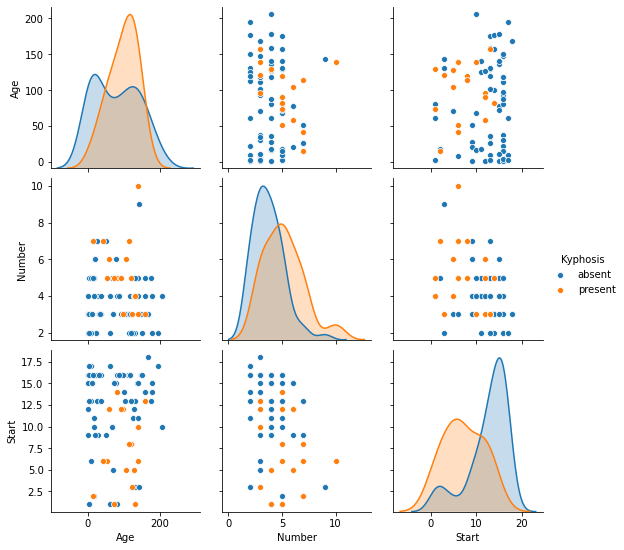

In [8]:
# Plot pairwise relationships in a dataset.
sns.pairplot(df,hue='Kyphosis')

In [9]:
# Train Test Split use to separe set of train and test data.
from sklearn.model_selection import train_test_split
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
y_train.value_counts()

absent     42
present    14
Name: Kyphosis, dtype: int64

In [11]:
y_test.value_counts()

absent     22
present     3
Name: Kyphosis, dtype: int64

In [12]:
# We use Decision Tree Classifier to predict values.
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
# Now we fit the model with train data.
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

      absent       0.95      0.82      0.88        22
     present       0.33      0.67      0.44         3

    accuracy                           0.80        25
   macro avg       0.64      0.74      0.66        25
weighted avg       0.87      0.80      0.83        25



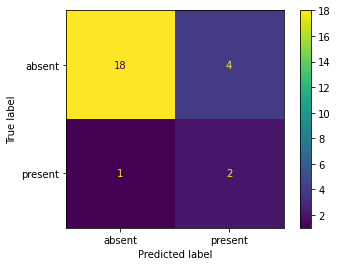

In [13]:
# Once train the model, we test with test data and create a confusion matrix to analyse the presicion of predicts.
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
predictions = dtree.predict(X_test)
cm = confusion_matrix(y_test,predictions)
matrix = plot_confusion_matrix(dtree, X_test, y_test)
print(classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

      absent       0.95      0.95      0.95        22
     present       0.67      0.67      0.67         3

    accuracy                           0.92        25
   macro avg       0.81      0.81      0.81        25
weighted avg       0.92      0.92      0.92        25



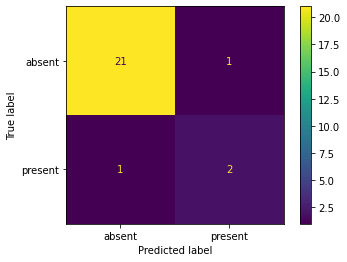

In [15]:
# Now use Random Forest Classifier to predict values.
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=919)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test,rfc_pred)
matrix = plot_confusion_matrix(rfc, X_test, y_test)
print(classification_report(y_test,rfc_pred)) 